In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

camb_path=os.path.realpath(os.path.join(os.getcwd(),'/home/lujia/CAMB/'))
import camb
from camb import model, initialpower
from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.1.3 installed at /home/lujia/miniconda3/lib/python3.8/site-packages/camb


In [2]:
pars = camb.CAMBparams()
#This function sets up the values of the parameters 
#:param H0: Hubble parameter today in km/s/Mpc. Can leave unset and instead set thetastar or cosmomc_theta
#                (which solves for the required H0).
#param ombh2: physical density in baryons
#param omch2:  physical density in cold dark matter
#param tau: optical depth; if None and zrei is None, current Reion settings are 
#param As: comoving curvature power at k=pivot_scalar (:math:`A_s`)
# param ns: scalar spectral index :math:`n_s`
# param mnu: sum of neutrino masses (in eV). Omega_nu is calculated approximately from this assuming neutrinos
# non-relativistic today; i.e. here is defined as a direct proxy for Omega_nu. Internally the actual
# physical mass is calculated from the Omega_nu accounting for small mass-dependent velocity corrections
# but neglecting spectral distortions to the neutrino distribution.
# Set the neutrino field values directly if you need finer control or more complex neutrino models.
pars.set_cosmology(H0=66.9, ombh2=0.0221, omch2=0.143-0.0221,
                   omk=0, tau=0.052)
pars.InitPower.set_params(As=((np.e)**3.04)*(10**(-10)), ns=0.963, r=0)
#pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

In [3]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [4]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
print(totCL.shape)

unlensedCL=powers['unlensed_scalar']
print(unlensedCL.shape)

(2401, 4)
(2401, 4)


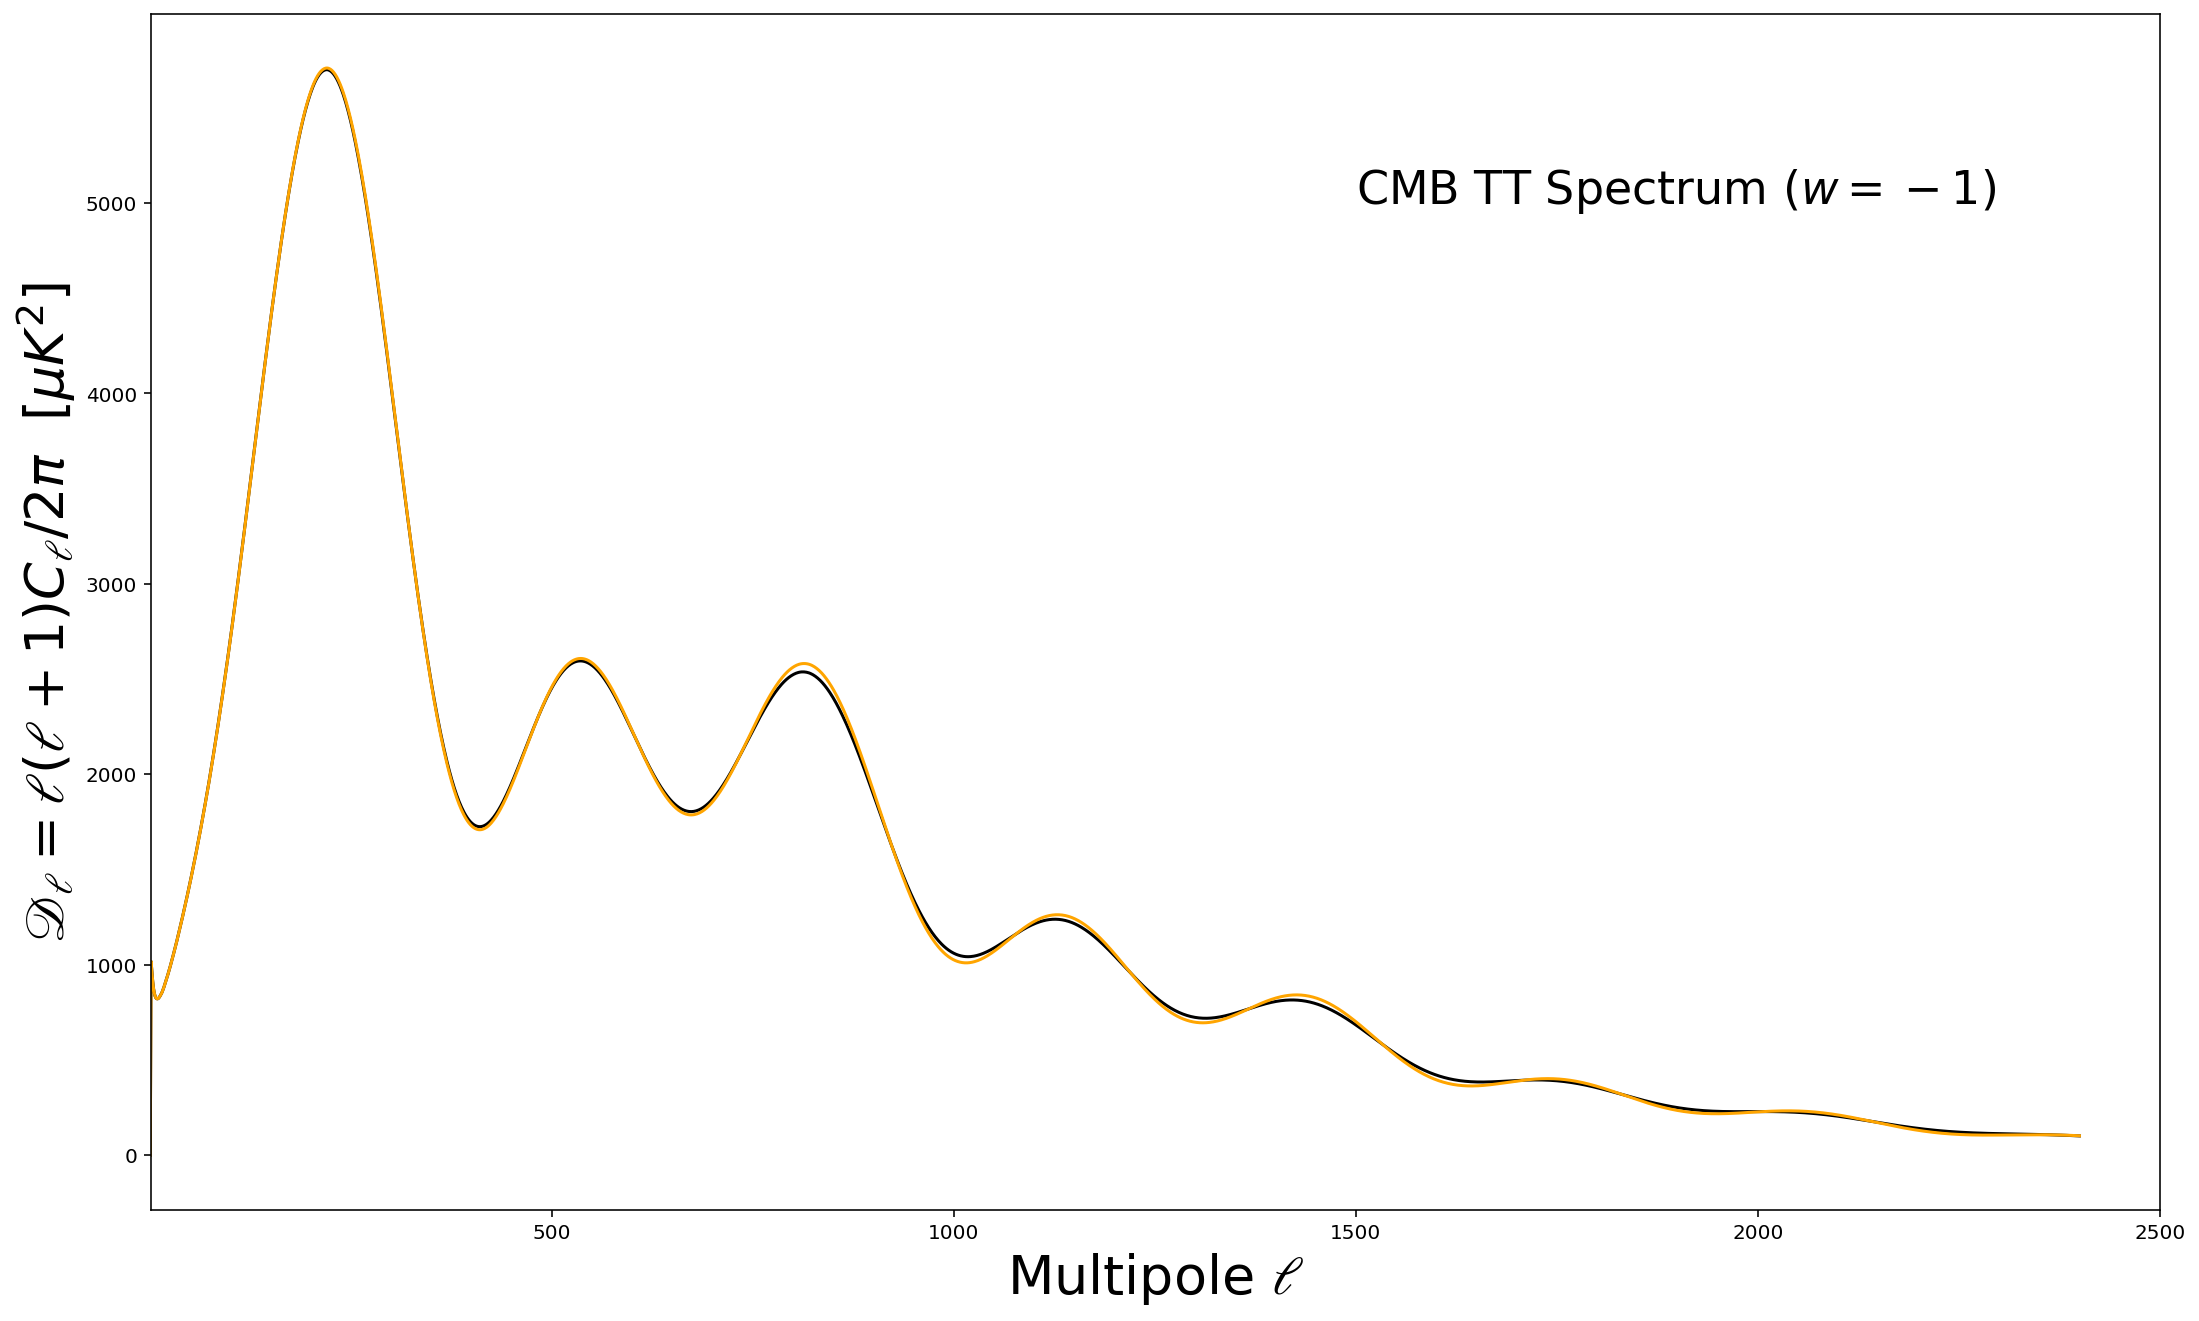

In [5]:
#plot CMB TT Spectra (w=-1)
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(figsize=(18,11))

ax.plot(ls,totCL[:,0], color='k')
ax.plot(ls,unlensedCL[:,0], color='orange')

#ax.set_title('$TT$', fontsize=19)
ax.set_xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
ax.set_ylabel(r'$\mathscr{D}_{\mathscr{l}} = \mathscr{l} (\mathscr{l} + 1) C_{\mathscr{l}} / 2\pi $'+ '  ' +'$[\mu K^2]$', 
              fontsize=27)
ax.text(1500, 5000, 'CMB TT Spectrum ($w=-1$)', fontsize='23')

matplotlib.rc('xtick', labelsize=22)     
matplotlib.rc('ytick', labelsize=22)
ax.set_xlim([2,2500]);

plt.savefig('CMB_TT_Spectrum_w=-1.png')

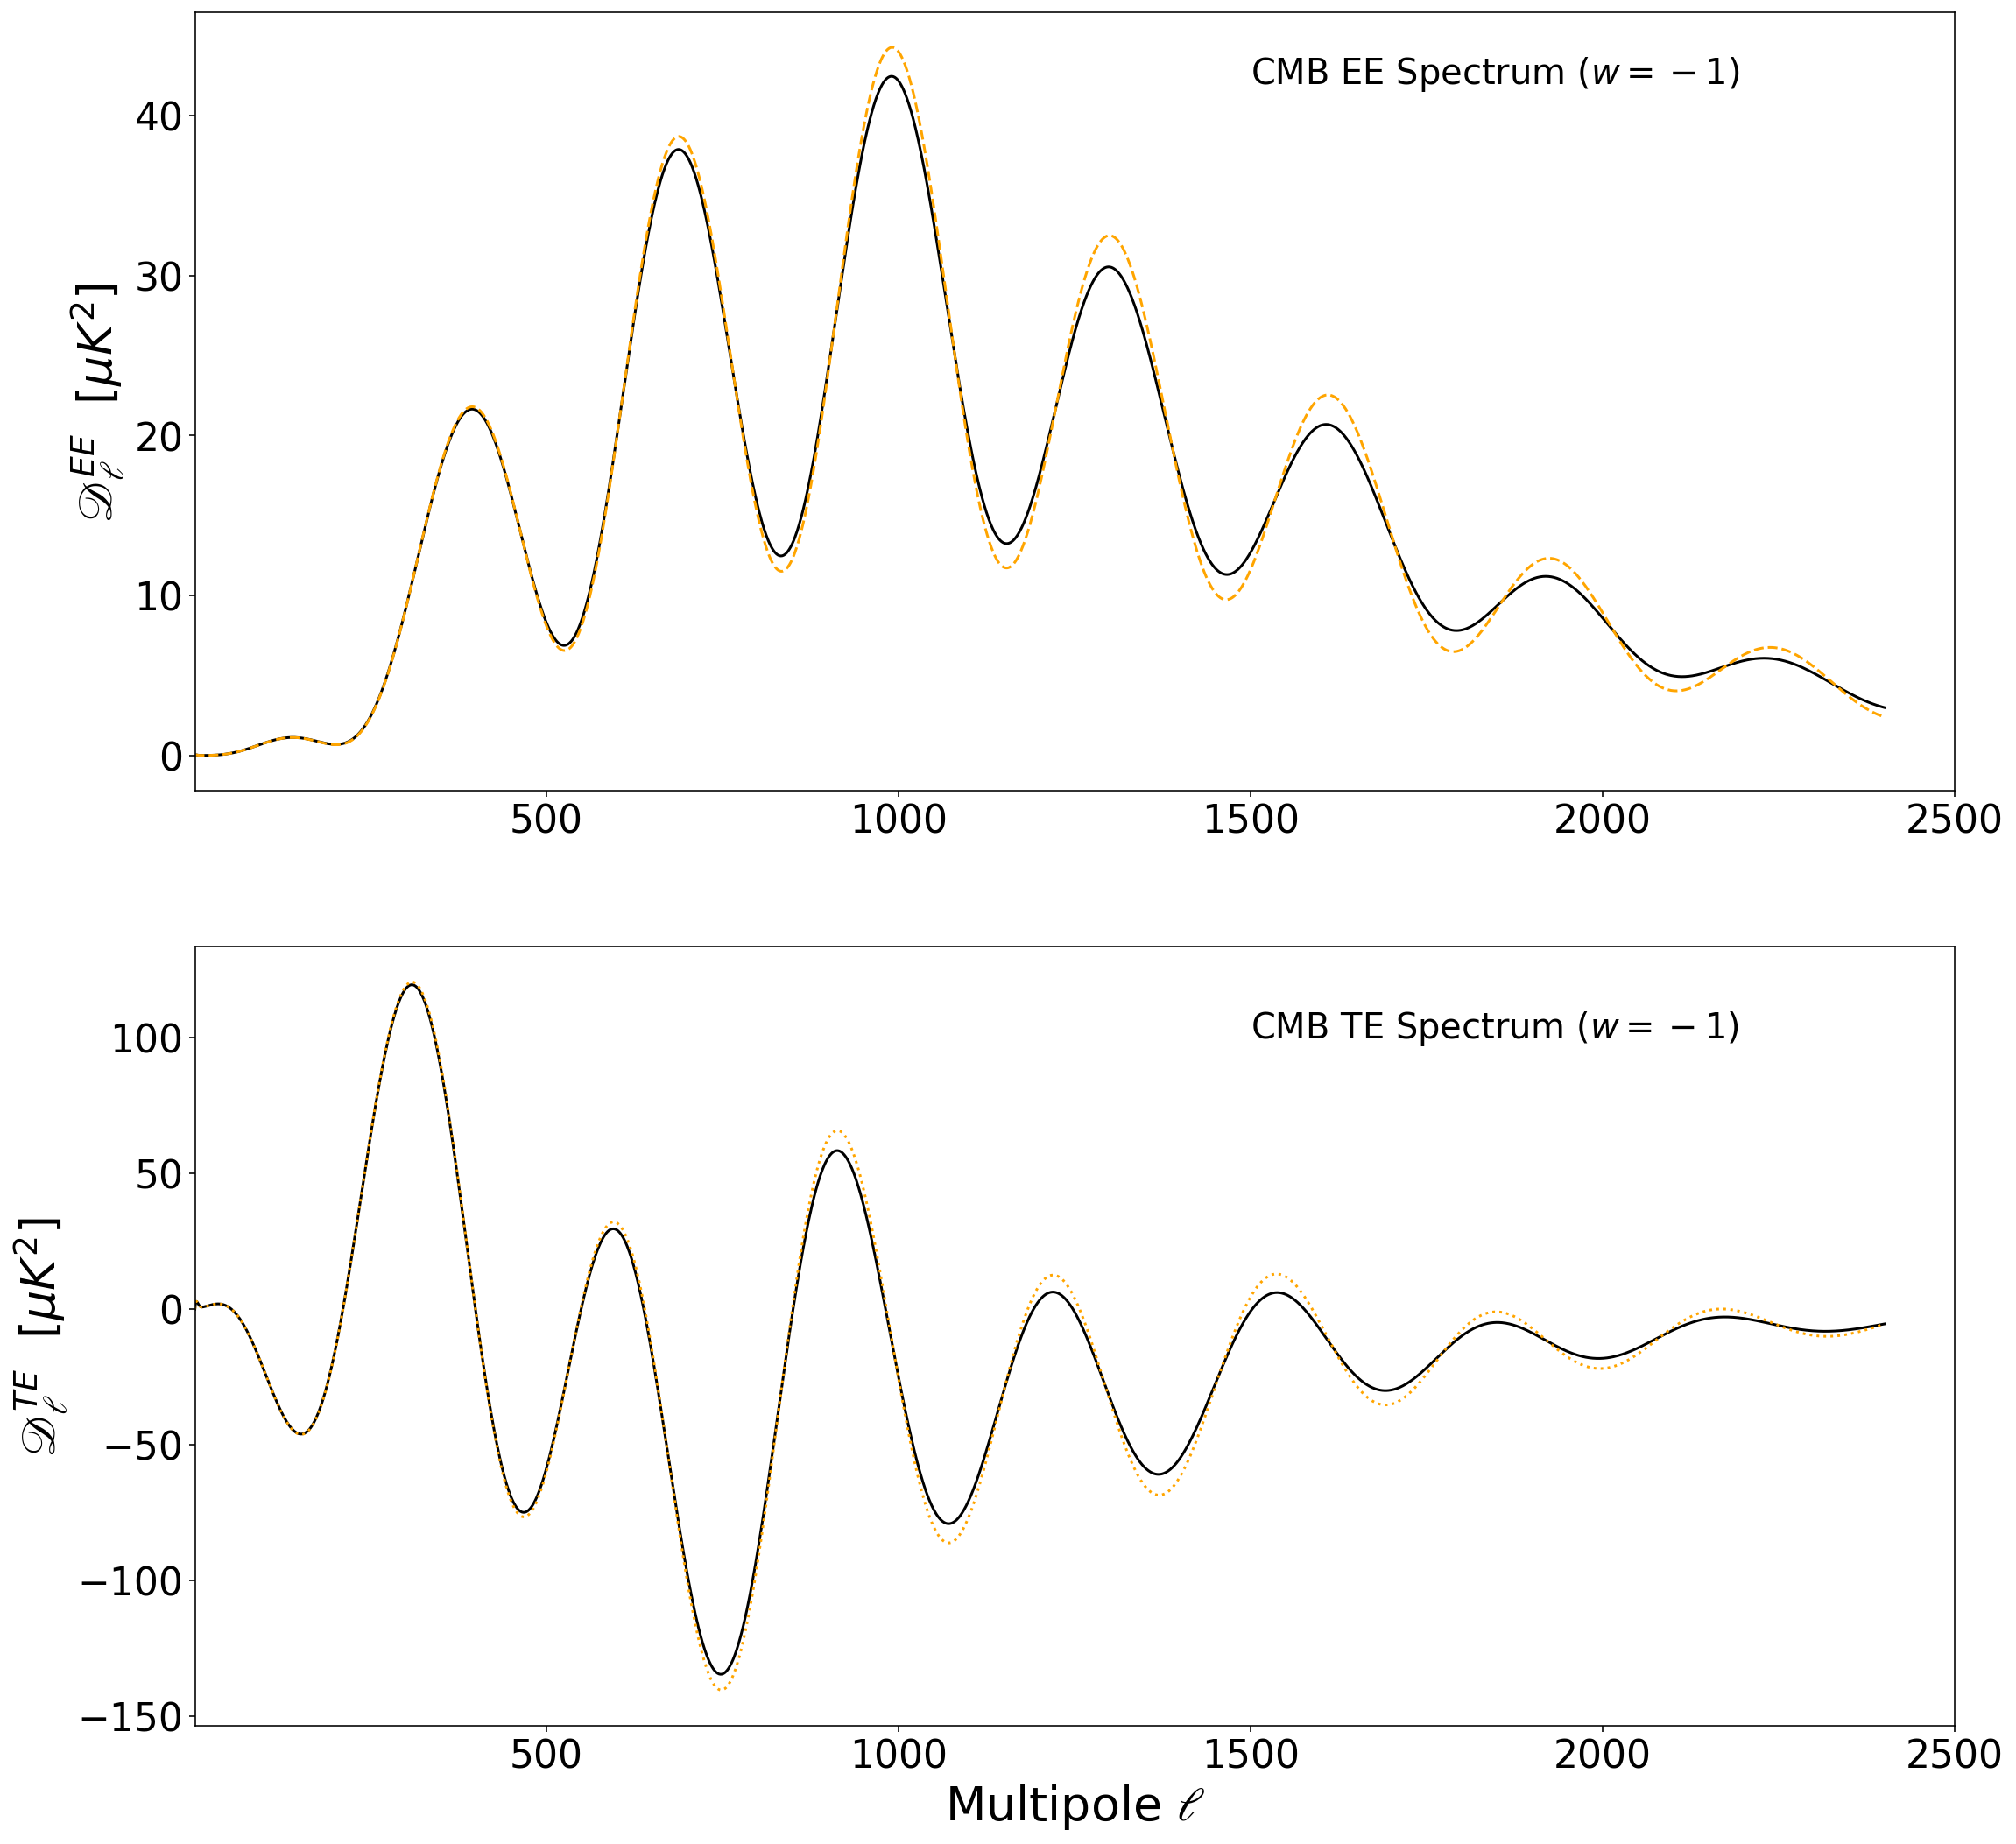

In [6]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
#plot EE TE spectra
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2, figsize = (18,18))

matplotlib.rc('xtick', labelsize=22)     
matplotlib.rc('ytick', labelsize=22)

ax[0].plot(ls,totCL[:,1], color='k')
ax[0].plot(ls,unlensedCL[:,1], color='orange', linestyle='--')
#ax[0].set_title(r'$EE$')
ax[0].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{EE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
ax[0].text(1500, 42, 'CMB EE Spectrum ($w=-1$)', fontsize=20)

ax[1].plot(ls,totCL[:,3], color='k')
ax[1].plot(ls,unlensedCL[:,3], color='orange', linestyle=':')
ax[1].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{TE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
#ax[1].set_title(r'$TE$')
ax[1].set_xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
ax[1].text(1500, 100, 'CMB TE Spectrum ($w=-1$)', fontsize=20)

for ax in ax.reshape(-1): ax.set_xlim([2,2500])
    
plt.savefig('CMB_TE_EE_Spectrum_w=-1.png')

Change the dark energy equation of state

w=-1.5

In [14]:
pars.DarkEnergy15 = DarkEnergyPPF(w=-1.5, wa=0)
print('w, wa model parameters:\n\n', pars.DarkEnergy15)
results15 = camb.get_background(pars)

w, wa model parameters:

 class: <DarkEnergyPPF>
 w = -1.5
 wa = 0.0
 cs2 = 1.0
 use_tabulated_w = False
 


In [15]:
powers15 =results15.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers15: print(name)
    #plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL15=powers15['total']
print(totCL15.shape)
unlensedCL15=powers15['unlensed_scalar']
print(unlensedCL15.shape)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2401, 4)
(2401, 4)


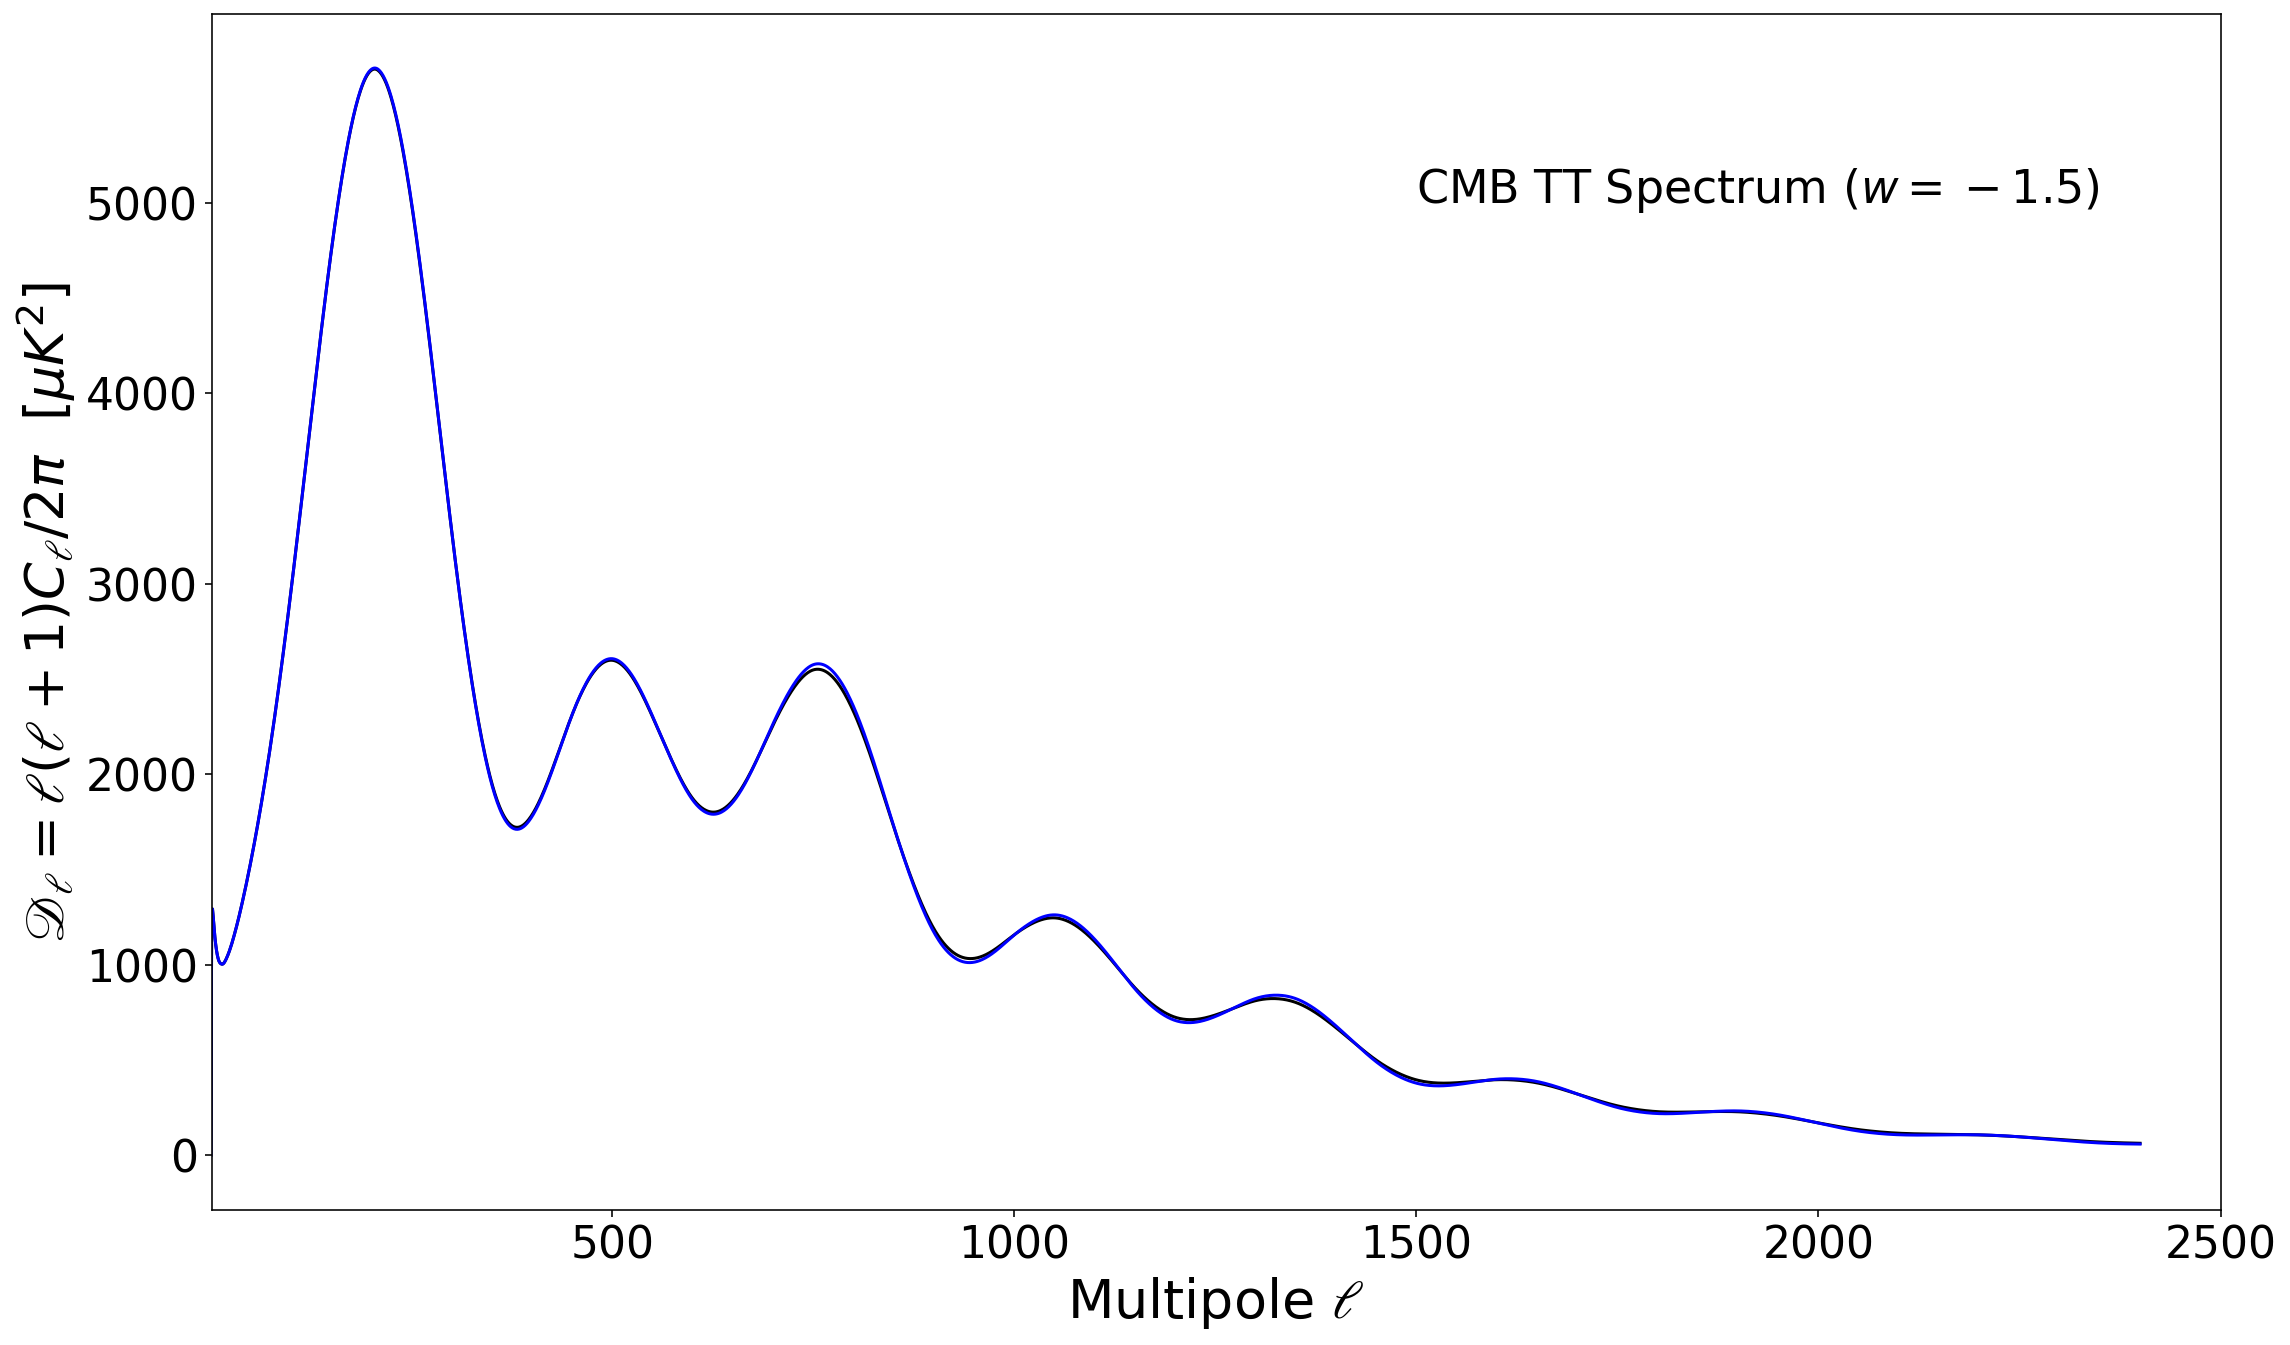

In [16]:
#w=-1.5
ls = np.arange(totCL15.shape[0])
fig, ax = plt.subplots(figsize=(18,11))

ax.plot(ls,totCL15[:,0], color='k')
ax.plot(ls,unlensedCL15[:,0], color='b')

#ax.set_title('$TT$', fontsize=19)
ax.set_xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
ax.set_ylabel(r'$\mathscr{D}_{\mathscr{l}} = \mathscr{l} (\mathscr{l} + 1) C_{\mathscr{l}} / 2\pi $'+ '  ' +'$[\mu K^2]$', 
              fontsize=27)
ax.text(1500, 5000, 'CMB TT Spectrum ($w=-1.5$)', fontsize='23')

matplotlib.rc('xtick', labelsize=22)     
matplotlib.rc('ytick', labelsize=22)
ax.set_xlim([2,2500]);

plt.savefig('CMB_TT_Spectrum_w=-15.png')

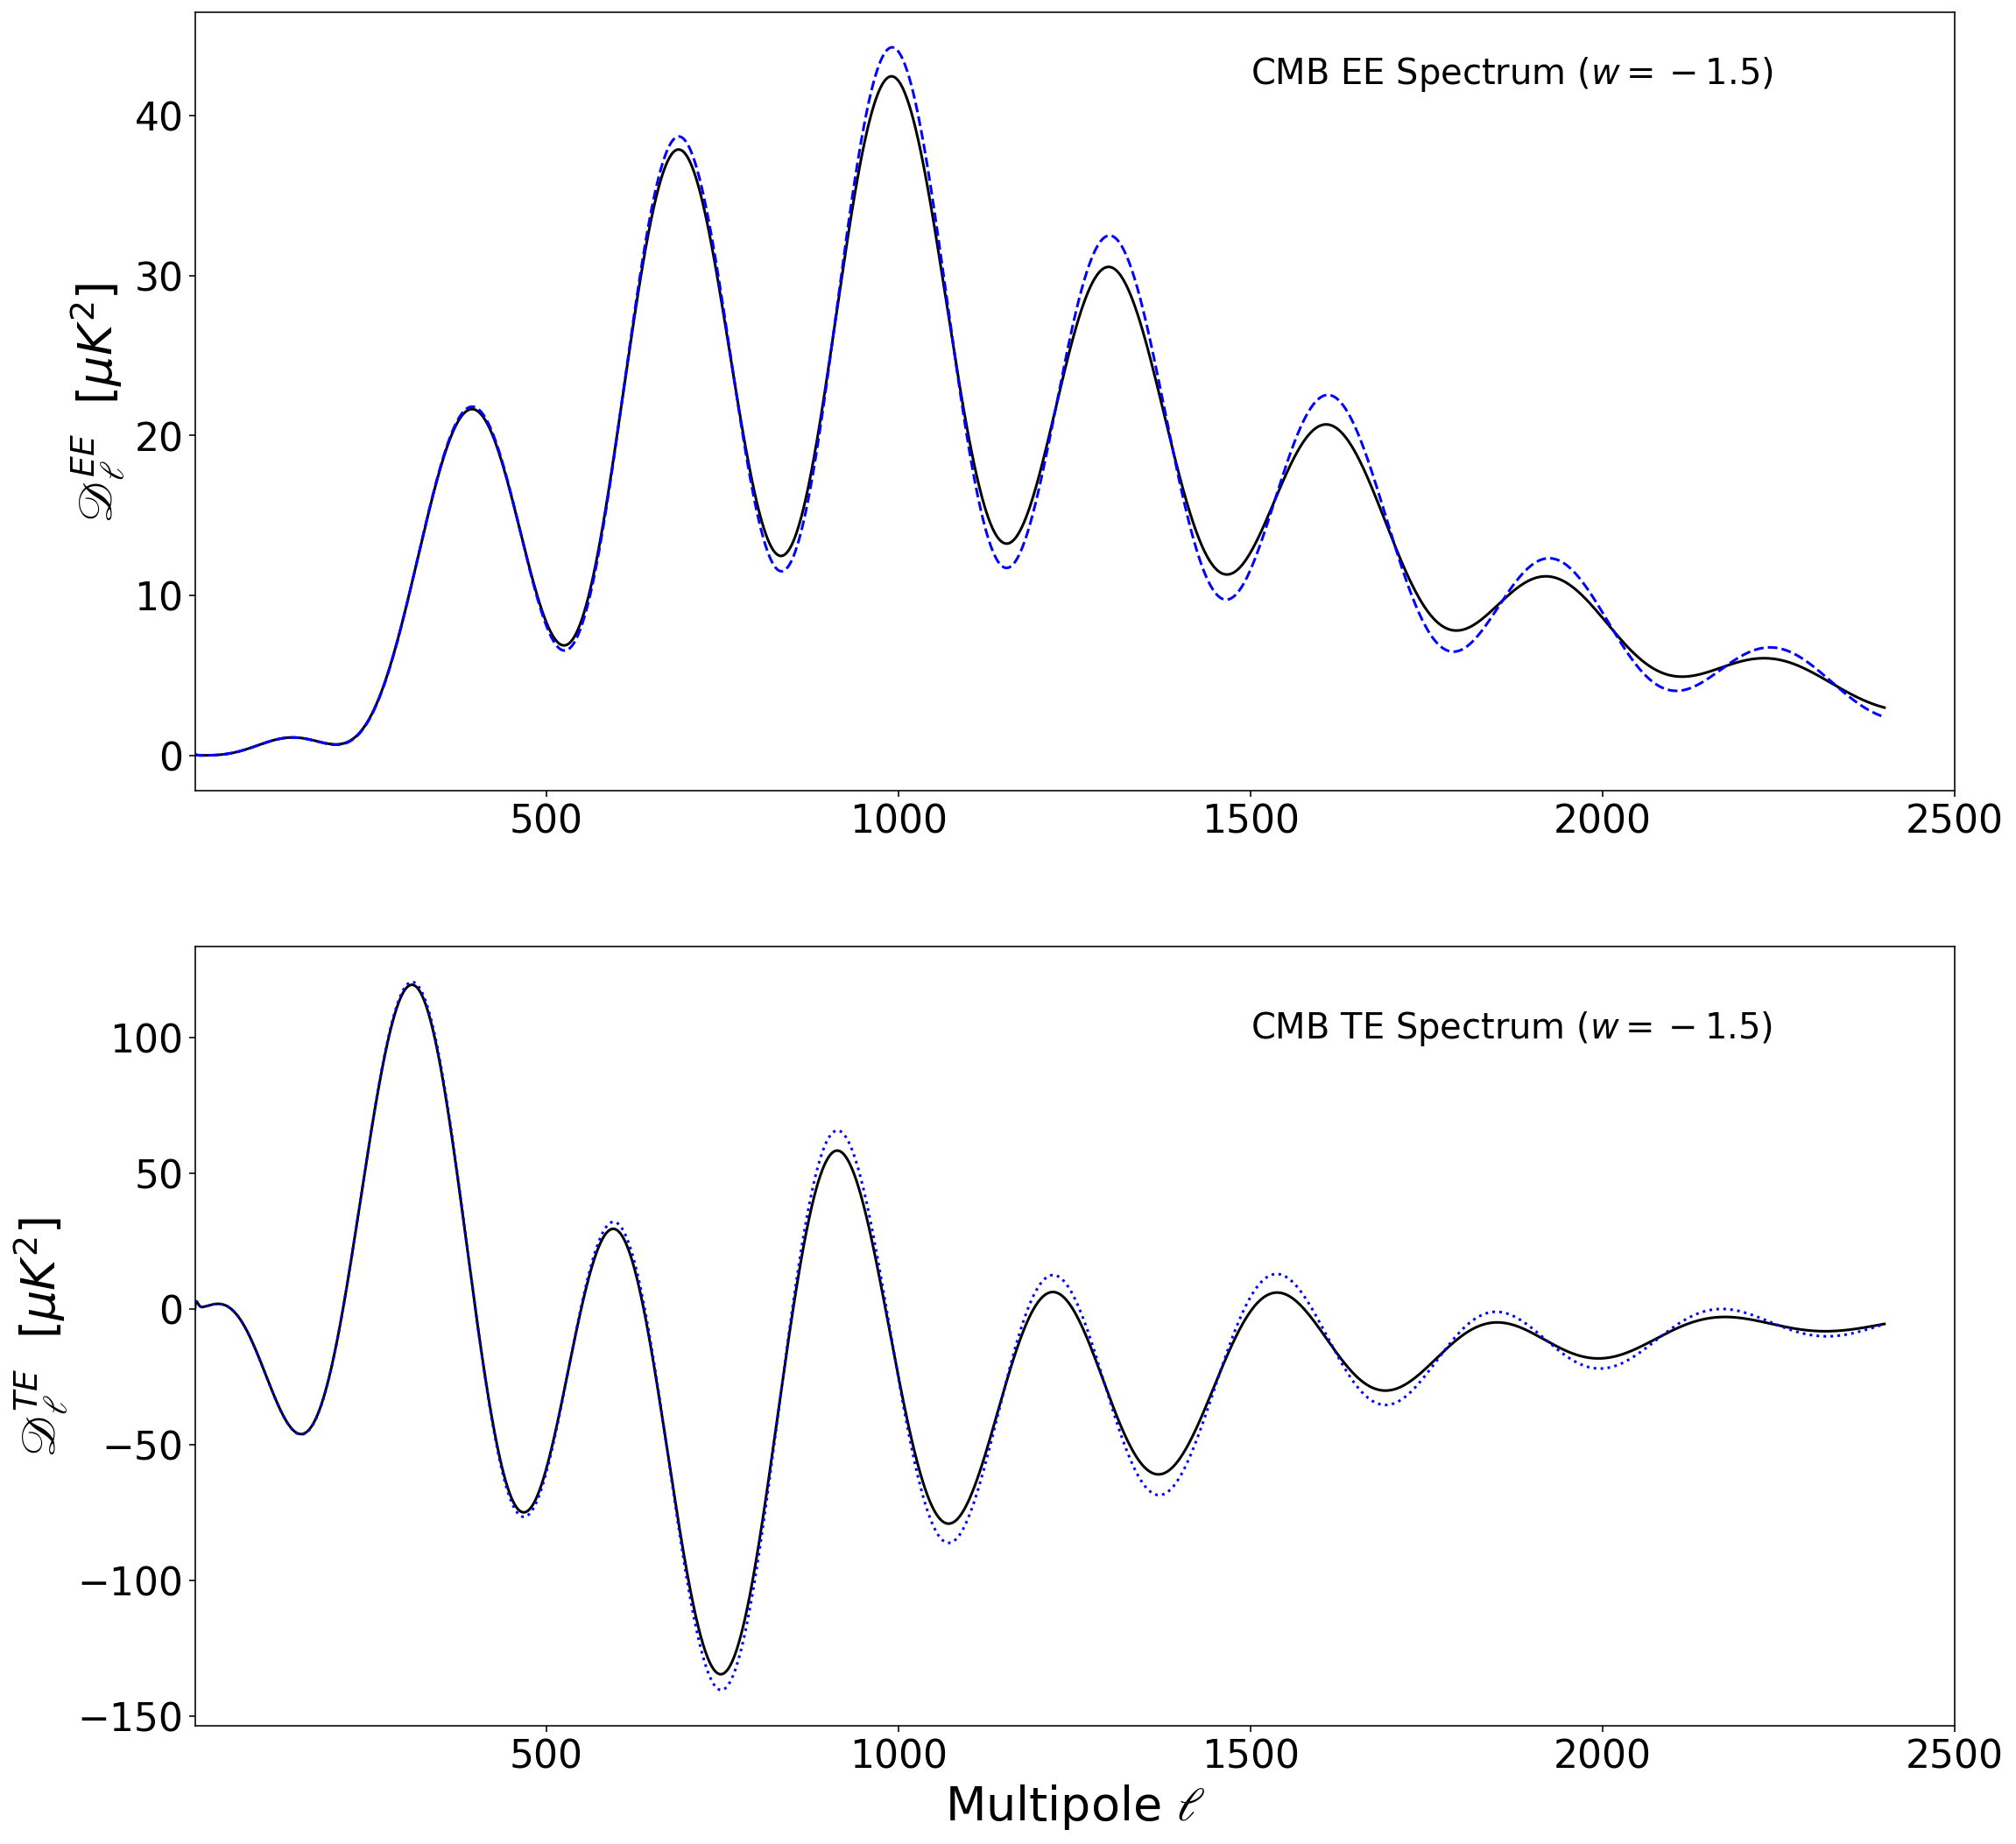

In [17]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2, figsize = (18,18))
#gs = plt.gridspec.GridSpec(2, 2)

matplotlib.rc('xtick', labelsize=22)     
matplotlib.rc('ytick', labelsize=22)

#ax[0].plot(ls,totCL[:,0], color='k')
#ax[0].plot(ls,unlensedCL[:,0], color='b')

ax[0].plot(ls,totCL[:,1], color='k')
ax[0].plot(ls,unlensedCL[:,1], color='b', linestyle='--')
#ax[0].set_title(r'$EE$')
ax[0].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{EE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
ax[0].text(1500, 42, 'CMB EE Spectrum ($w=-1.5$)', fontsize=20)

ax[1].plot(ls,totCL[:,3], color='k')
ax[1].plot(ls,unlensedCL[:,3], color='b', linestyle=':')
ax[1].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{TE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
#ax[1].set_title(r'$TE$')
ax[1].set_xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
ax[1].text(1500, 100, 'CMB TE Spectrum ($w=-1.5$)', fontsize=20)

for ax in ax.reshape(-1): ax.set_xlim([2,2500])
    
plt.savefig('CMB_TE_EE_Spectrum_w=-15.png')

w=-0.5

In [18]:
#w=-0.5
pars.DarkEnergy05 = DarkEnergyPPF(w=-0.5, wa=0)
print('w, wa model parameters:\n\n', pars.DarkEnergy05)
results05 = camb.get_background(pars)

w, wa model parameters:

 class: <DarkEnergyPPF>
 w = -0.5
 wa = 0.0
 cs2 = 1.0
 use_tabulated_w = False
 


In [19]:
powers05 =results05.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers05: print(name)
    #plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL05=powers05['total']
print(totCL05.shape)
unlensedCL05=powers05['unlensed_scalar']
print(unlensedCL05.shape)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2401, 4)
(2401, 4)


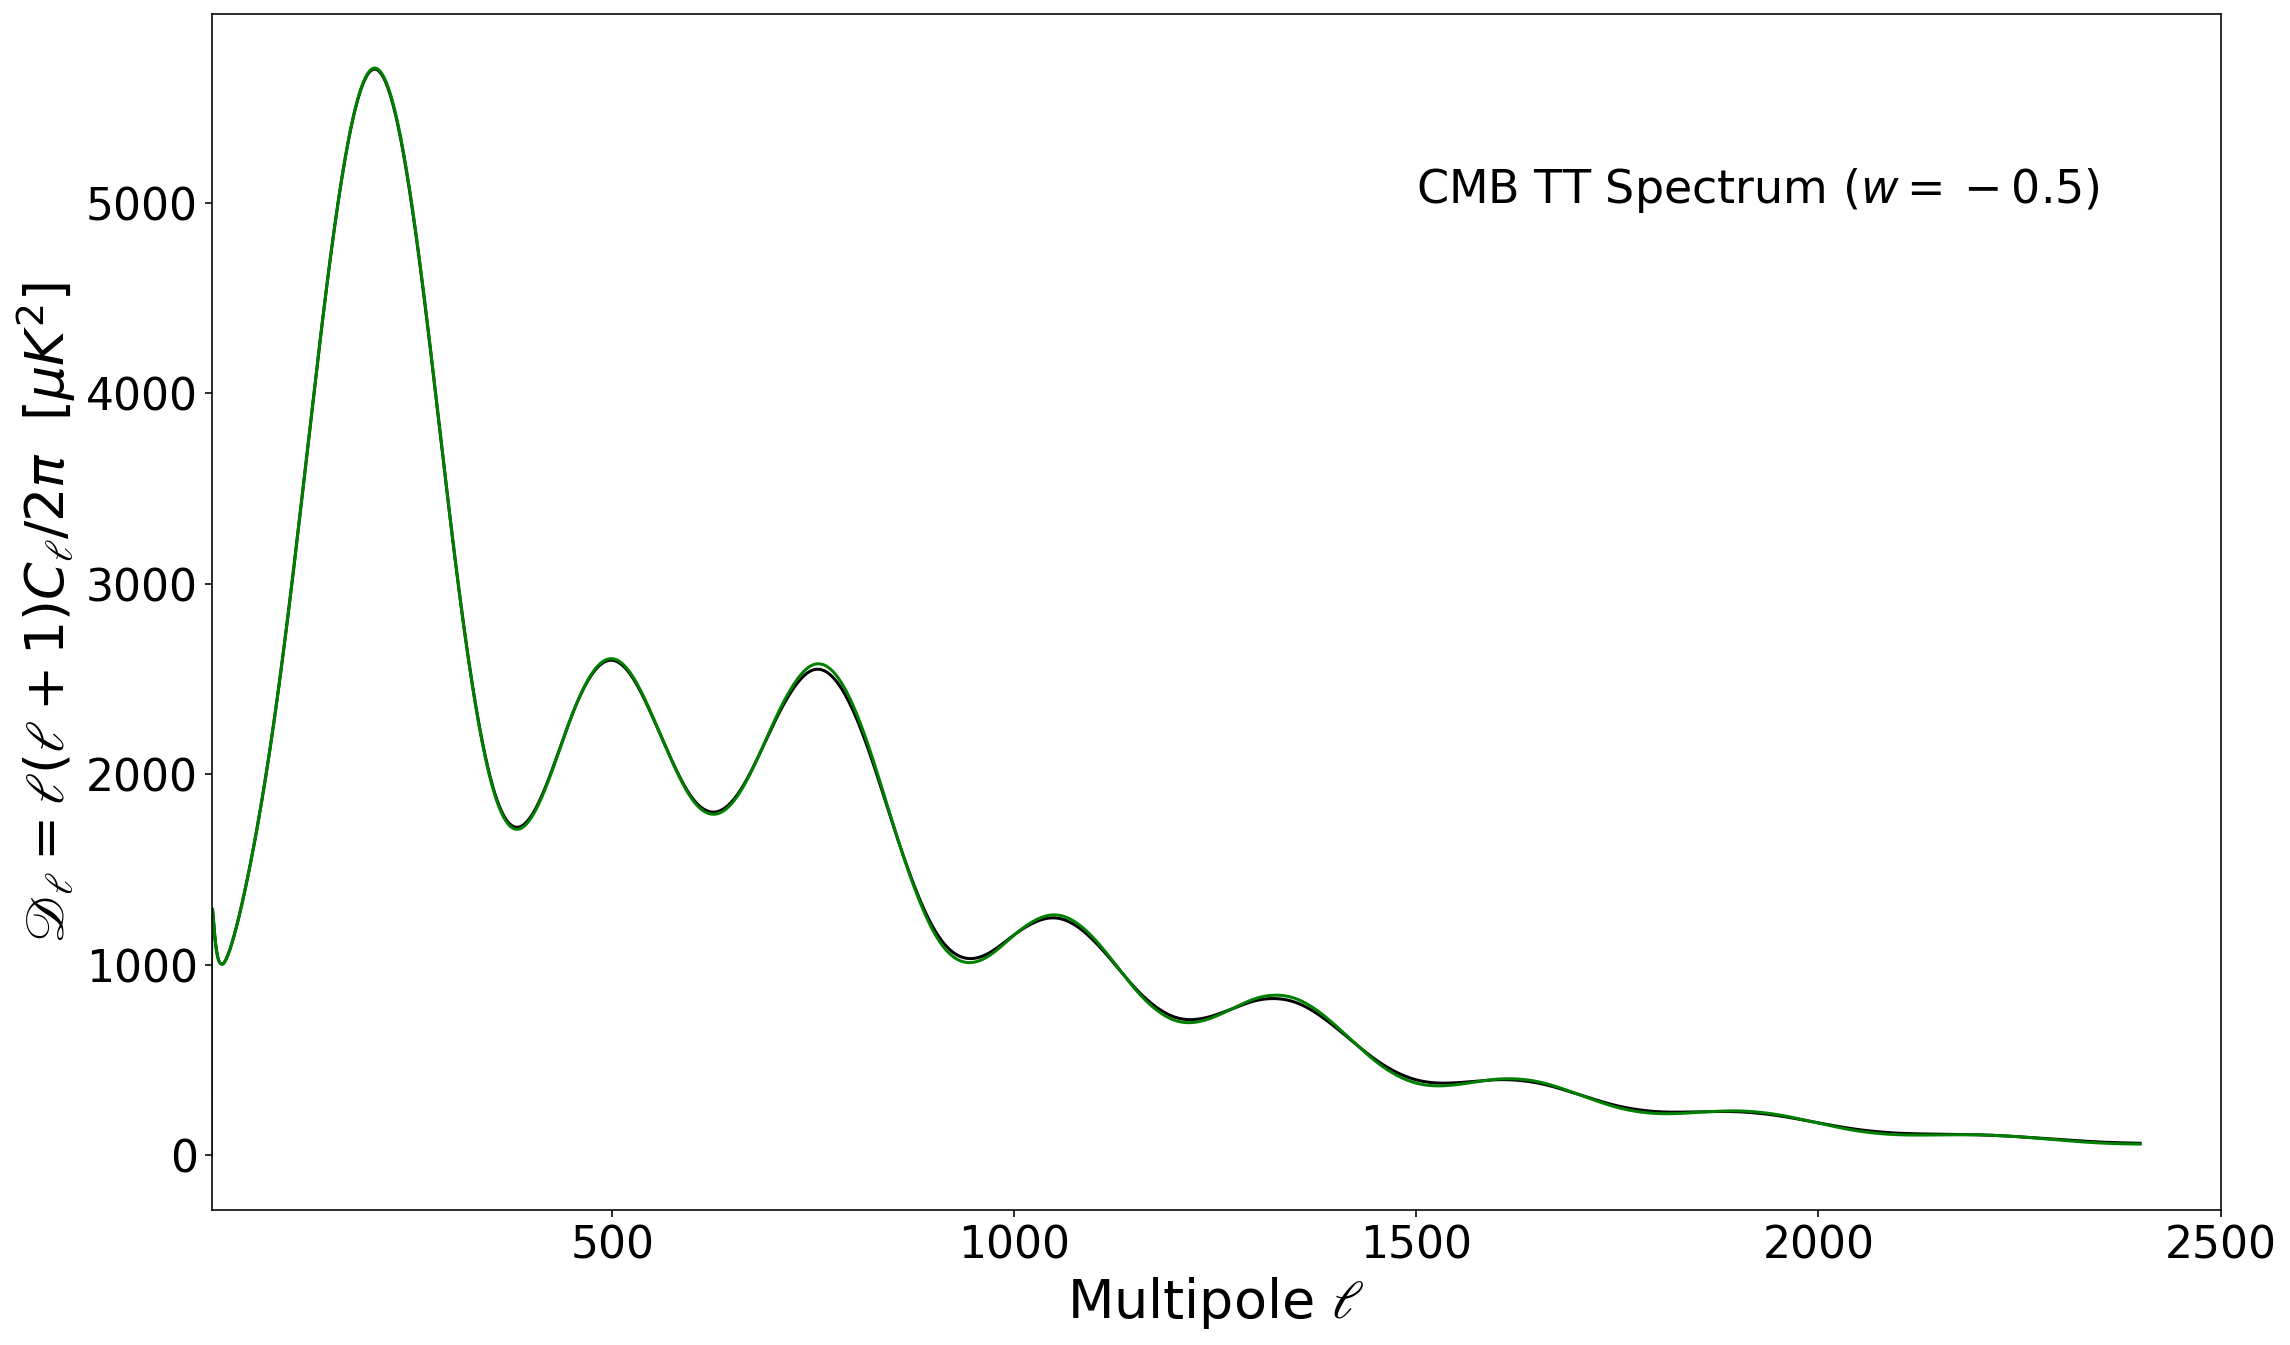

In [20]:
#w=-0.5
ls = np.arange(totCL05.shape[0])
fig, ax = plt.subplots(figsize=(18,11))

ax.plot(ls,totCL05[:,0], color='k')
ax.plot(ls,unlensedCL05[:,0], color='g')

#ax.set_title('$TT$', fontsize=19)
ax.set_xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
ax.set_ylabel(r'$\mathscr{D}_{\mathscr{l}} = \mathscr{l} (\mathscr{l} + 1) C_{\mathscr{l}} / 2\pi $'+ '  ' +'$[\mu K^2]$', 
              fontsize=27)
ax.text(1500, 5000, 'CMB TT Spectrum ($w=-0.5$)', fontsize='23')

matplotlib.rc('xtick', labelsize=22)     
matplotlib.rc('ytick', labelsize=22)
ax.set_xlim([2,2500]);

plt.savefig('CMB_TT_Spectrum_w=-05.png')

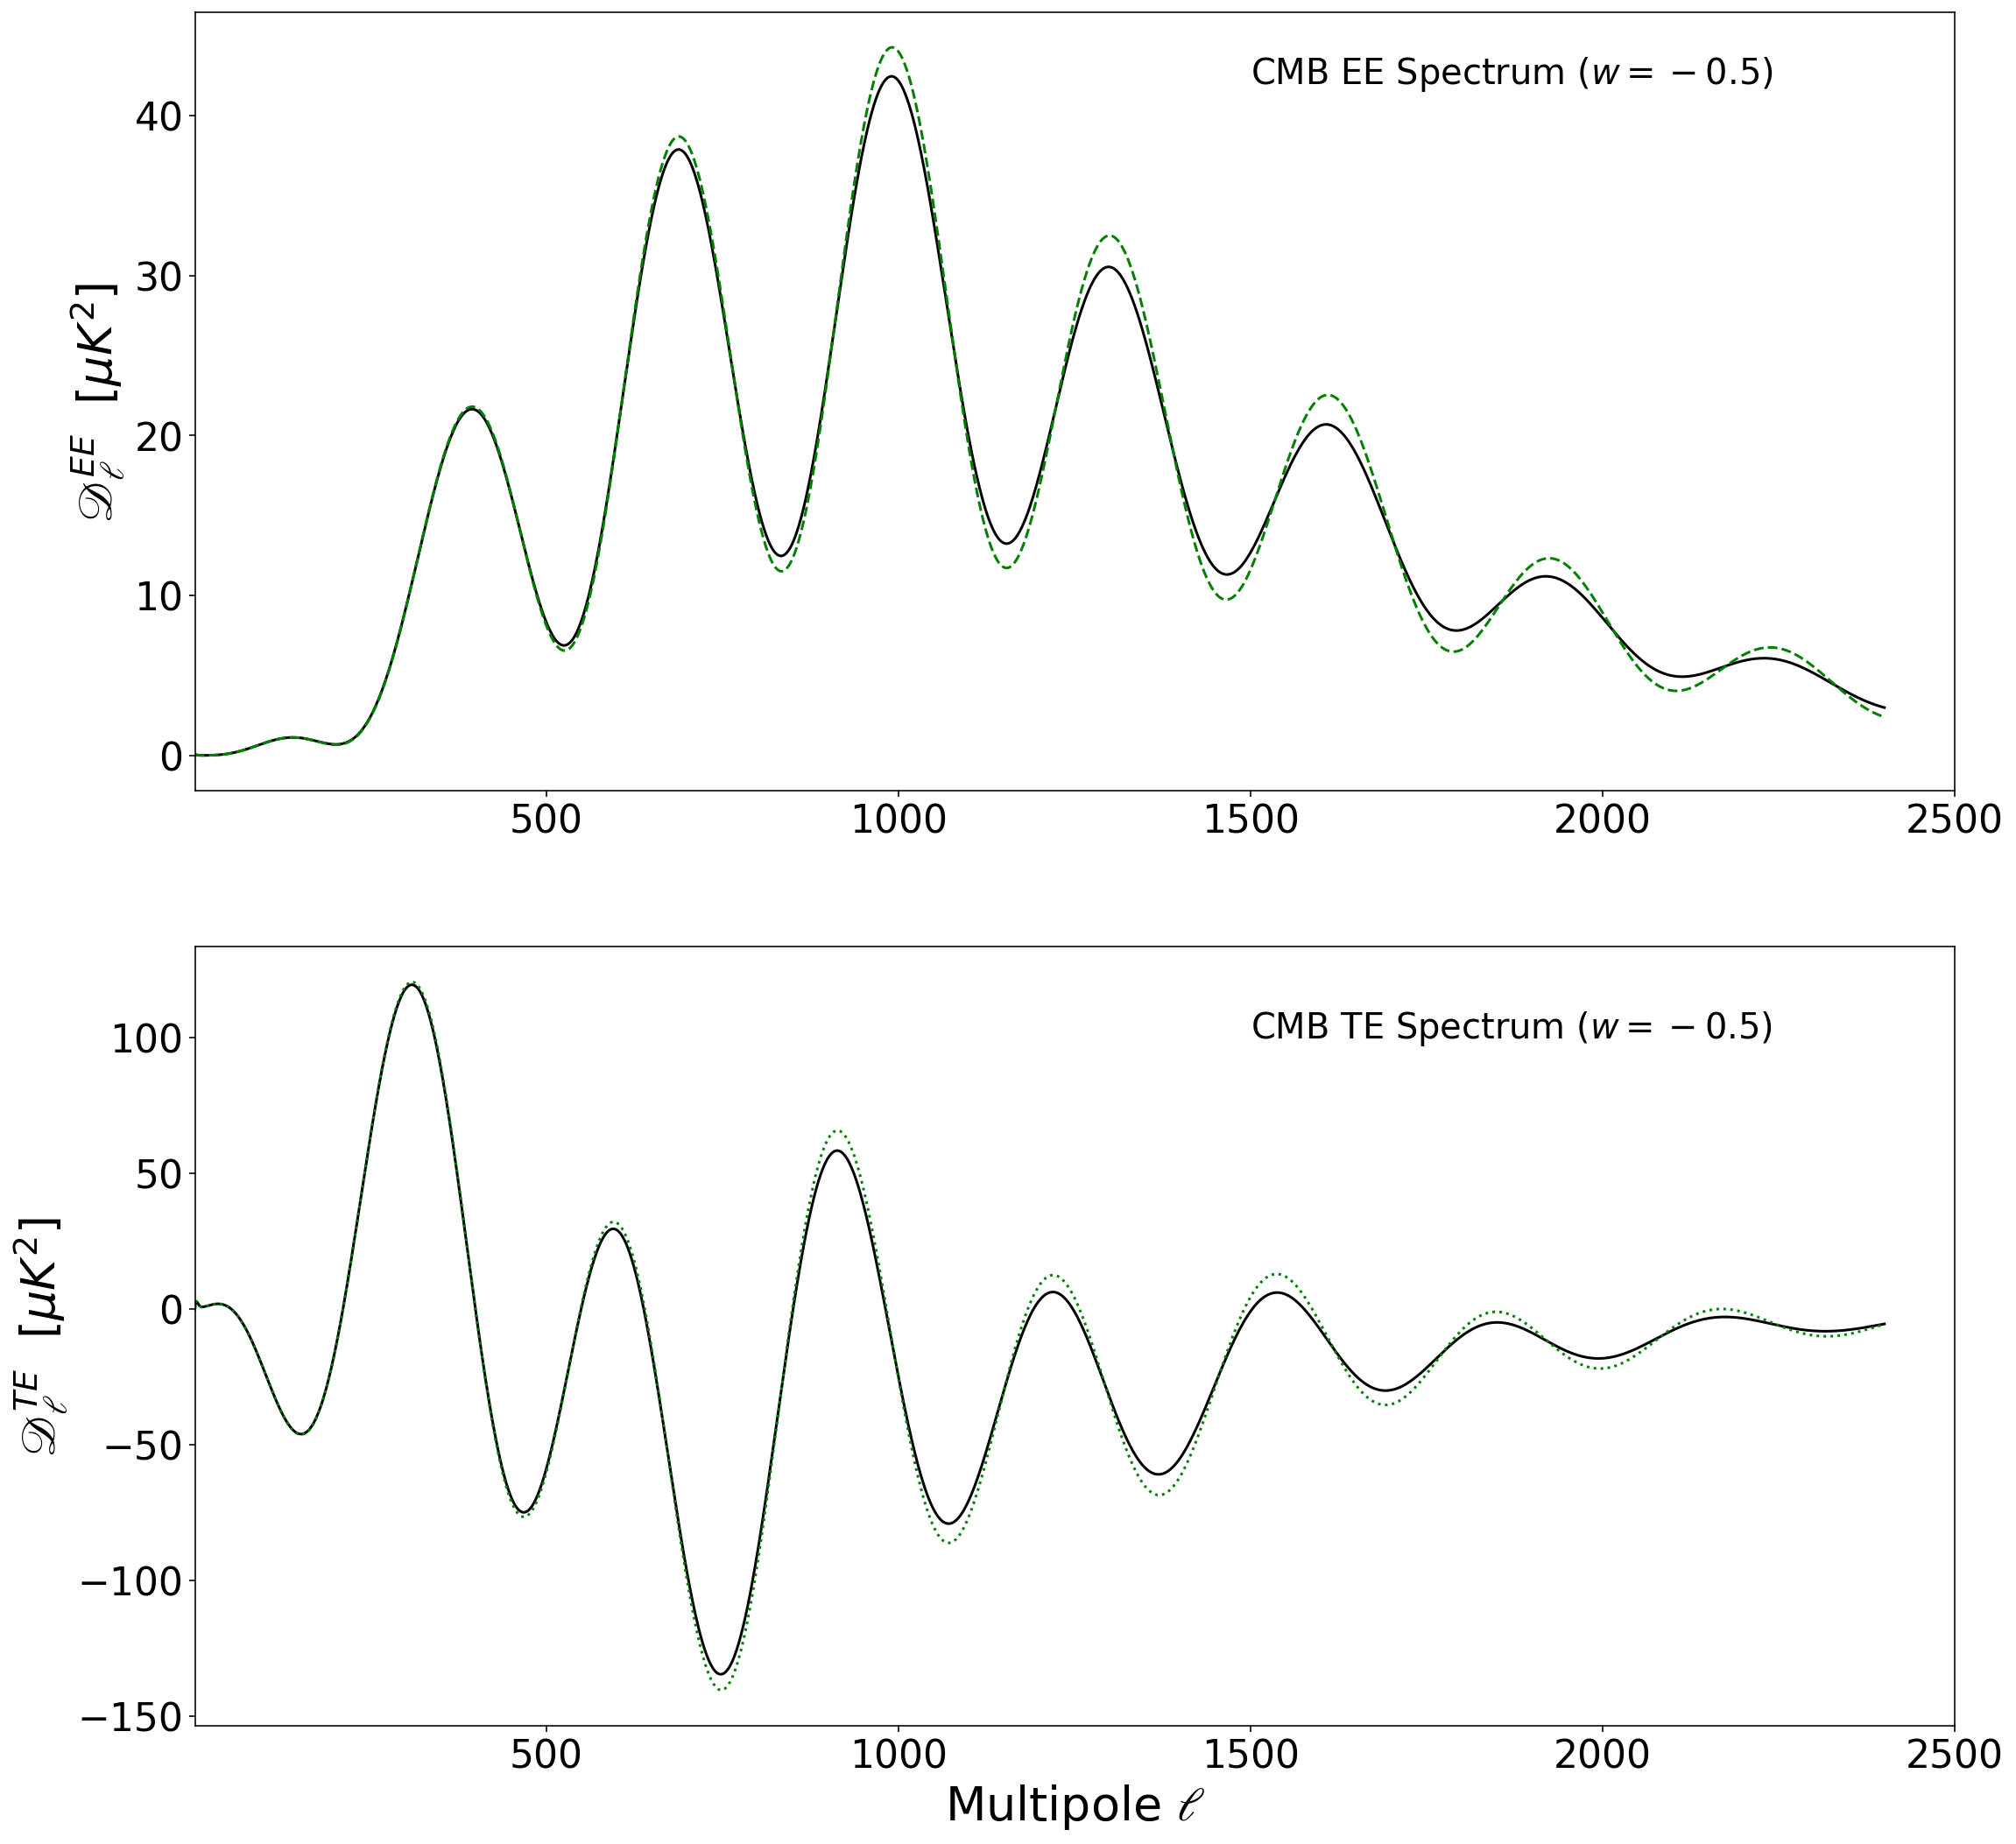

In [21]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2, figsize = (18,18))
#gs = plt.gridspec.GridSpec(2, 2)

matplotlib.rc('xtick', labelsize=22)     
matplotlib.rc('ytick', labelsize=22)

#ax[0].plot(ls,totCL[:,0], color='k')
#ax[0].plot(ls,unlensedCL[:,0], color='b')

ax[0].plot(ls,totCL[:,1], color='k')
ax[0].plot(ls,unlensedCL[:,1], color='g', linestyle='--')
#ax[0].set_title(r'$EE$')
ax[0].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{EE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
ax[0].text(1500, 42, 'CMB EE Spectrum ($w=-0.5$)', fontsize=20)

ax[1].plot(ls,totCL[:,3], color='k')
ax[1].plot(ls,unlensedCL[:,3], color='g', linestyle=':')
ax[1].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{TE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
#ax[1].set_title(r'$TE$')
ax[1].set_xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
ax[1].text(1500, 100, 'CMB TE Spectrum ($w=-0.5$)', fontsize=20)

for ax in ax.reshape(-1): ax.set_xlim([2,2500])
    
plt.savefig('CMB_TE_EE_Spectrum_w=-05.png')

#comparision of the CMB spectrum with different equation of state

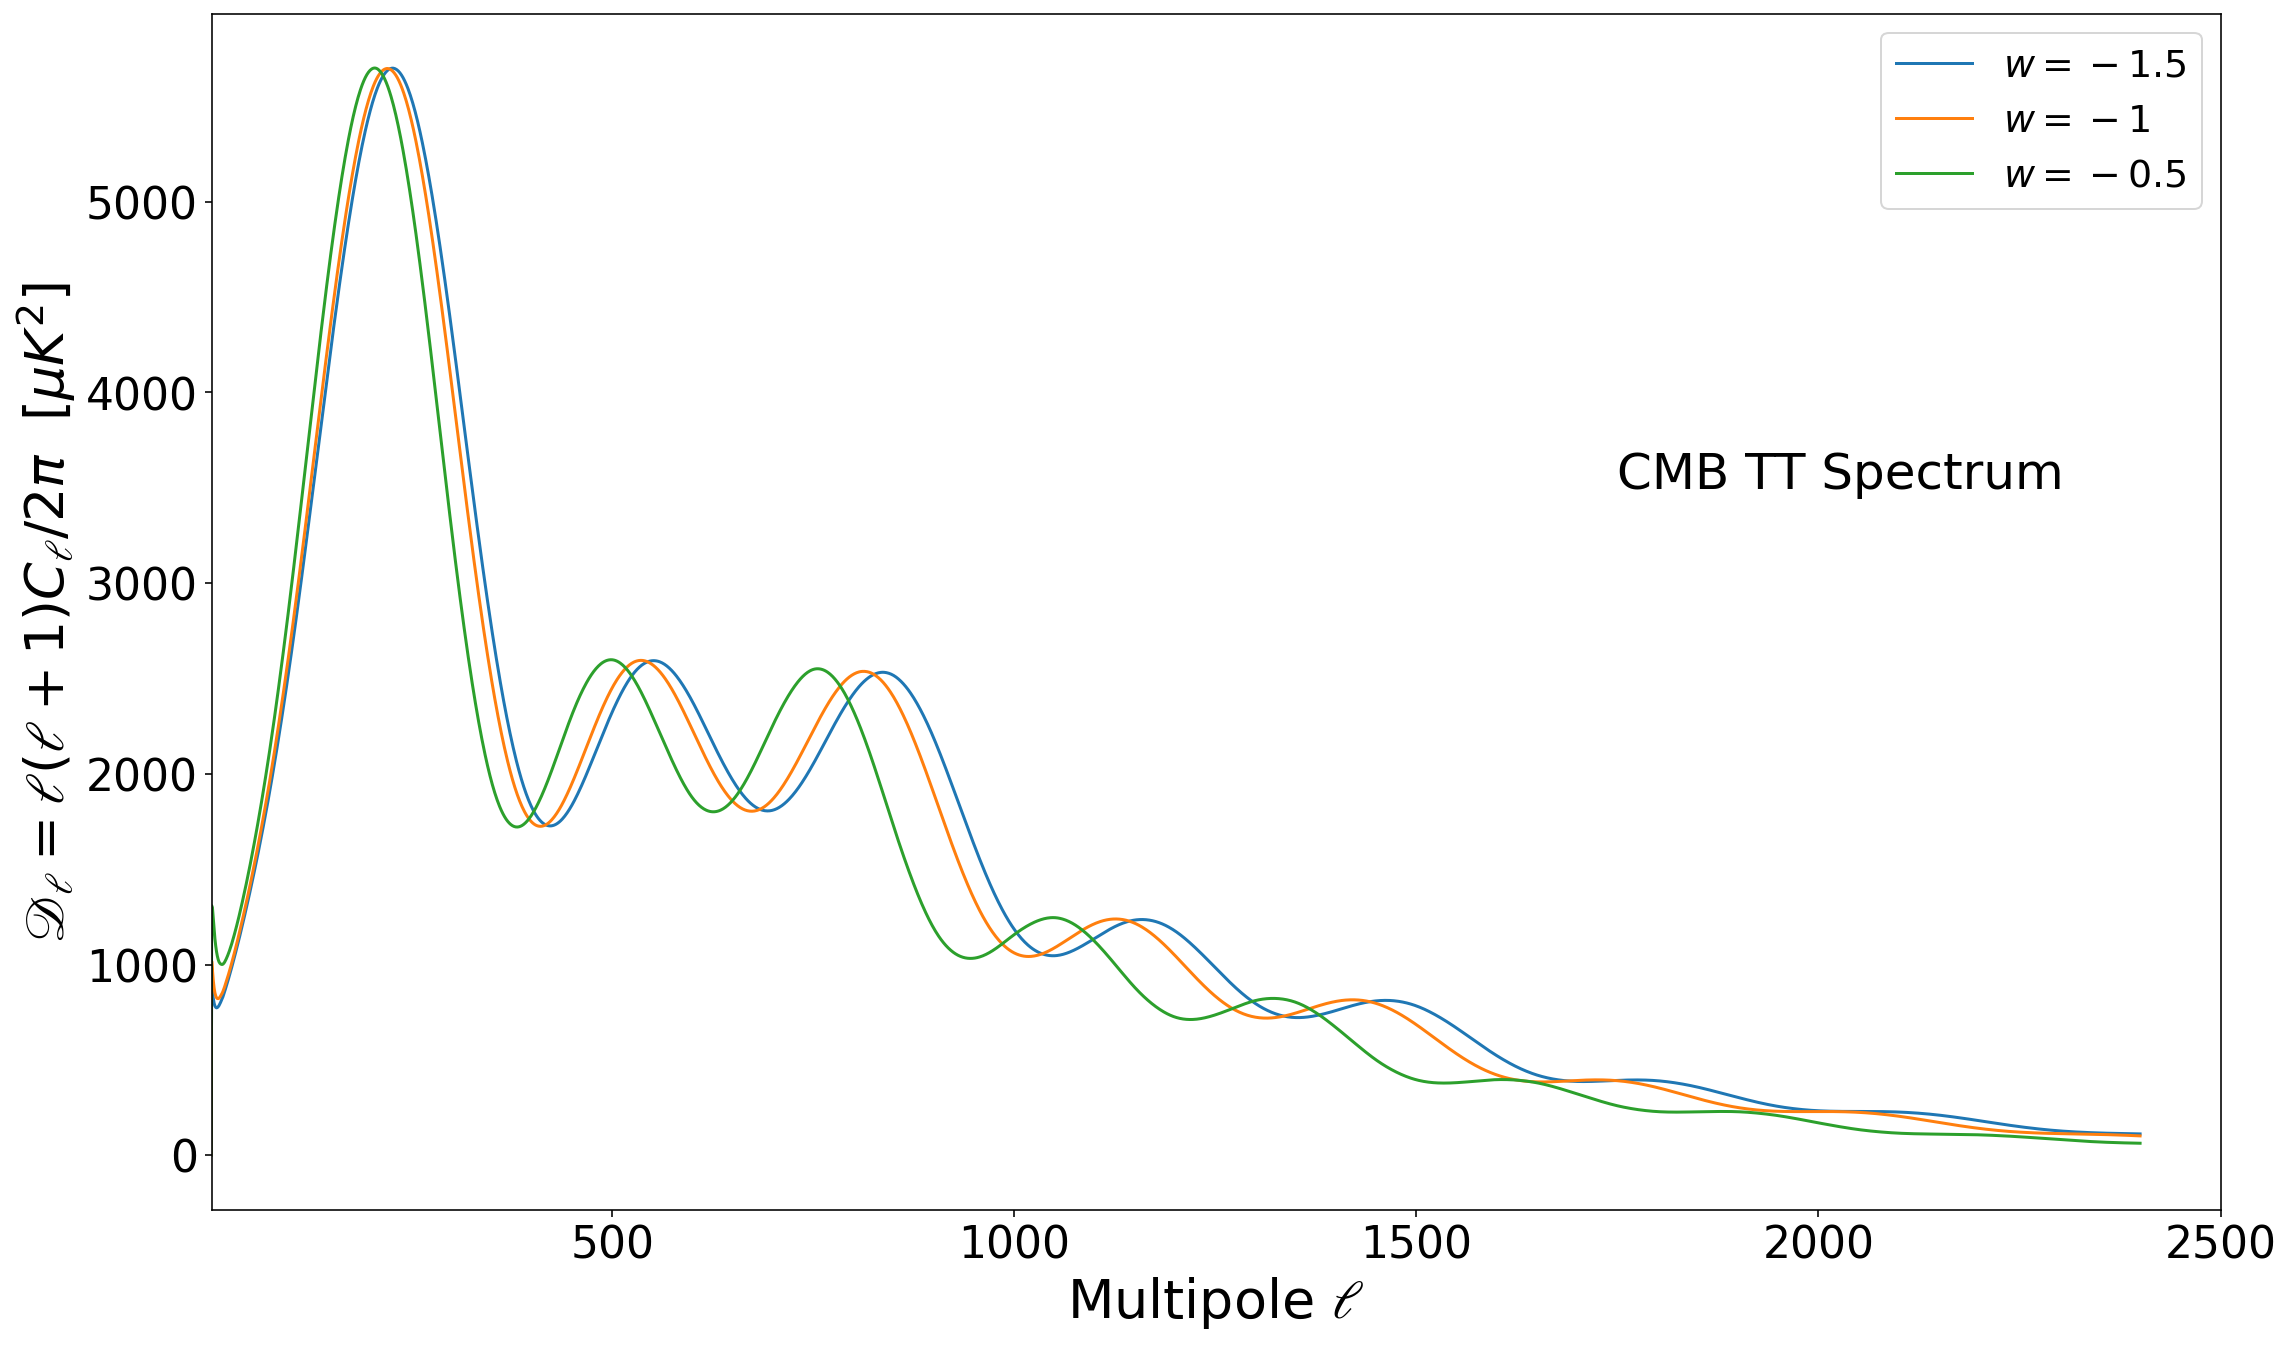

In [22]:
plt.figure(figsize=(18,11))
plt.xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
plt.ylabel(r'$\mathscr{D}_{\mathscr{l}} = \mathscr{l} (\mathscr{l} + 1) C_{\mathscr{l}} / 2\pi $'+ '  ' +'$[\mu K^2]$', 
              fontsize=27)
#ax.text(1600, 4500, 'CMB TT Spectrum', fontsize='23')

ws = np.linspace(-1.5, -0.5, 3)
for w in ws:
    pars.set_dark_energy(w=w, wa=0, dark_energy_model='fluid') 
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    totCL=powers['total']
    plt.plot(np.arange(totCL.shape[0]), totCL[:,0])
 
plt.xlim(2, 2500)
plt.legend(['$w=-1.5$','$w=-1$','$w=-0.5$'], fontsize='19',loc='best')
plt.text(1750, 3500, 'CMB TT Spectrum', fontsize='25')
plt.savefig('CMB_TT_Spectrum_Comparision.png')

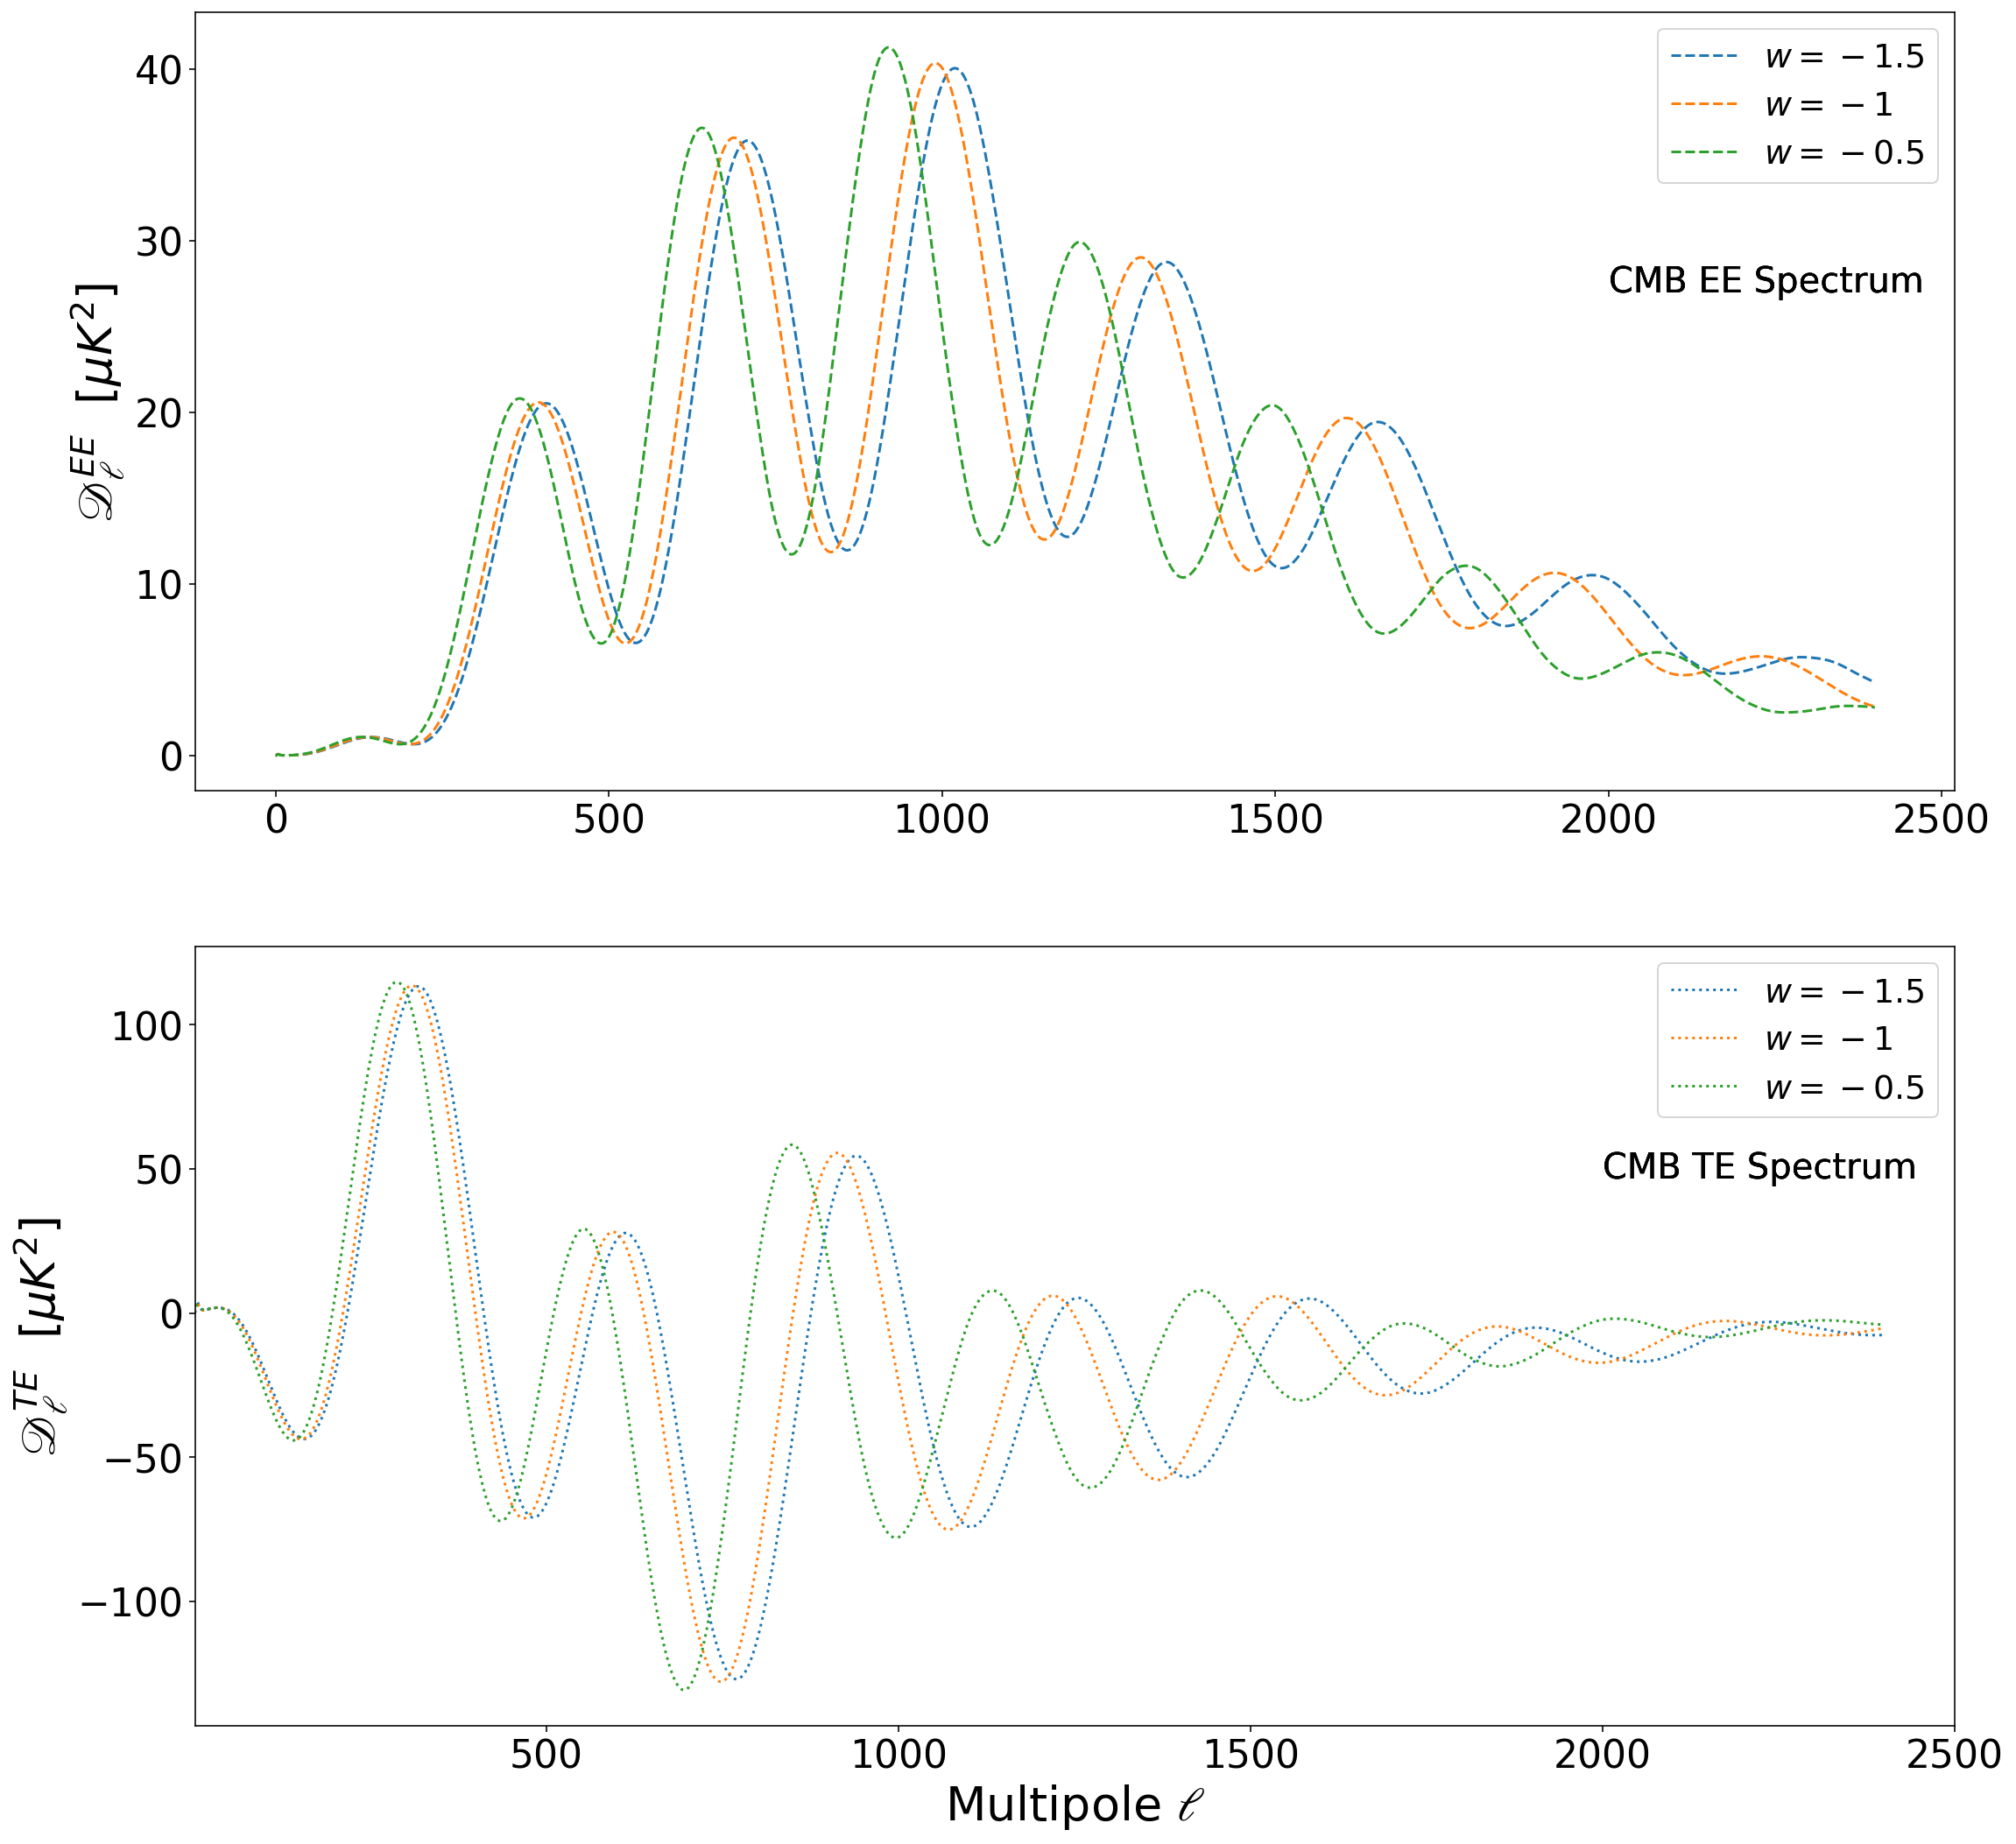

In [23]:
#Plot CMB lensing potential power for various values of w
pars = camb.CAMBparams()
pars.set_cosmology(H0=66.9, ombh2=0.0221, omch2=0.143-0.0221)
pars.InitPower.set_params(As=(np.e)**(3.04)*(10**(-10)), ns=0.963)
#pars.set_for_lmax(2000, lens_potential_accuracy=1)

ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2, figsize = (18,18))

#plt.figure(figsize=(9,9))
plt.xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
#plt.ylabel(r'$\mathscr{D}_{\mathscr{l}} = \mathscr{l} (\mathscr{l} + 1) C_{\mathscr{l}} / 2\pi $'+ '  ' +'$[\mu K^2]$', 
#              fontsize=27)

ws = np.linspace(-1.5, -0.5, 3)
for w in ws:
    pars.set_dark_energy(w=w, wa=0, dark_energy_model='fluid') 
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    totCL=powers['total']
    ax[0].plot(ls,totCL[:,1], linestyle='--')
    #ax[0].plot(ls,unlensedCL[:,1], linestyle='--')
    #ax[0].set_title(r'$EE$')
    ax[0].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{EE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
    ax[0].text(2000, 27, 'CMB EE Spectrum', fontsize=20)
    ax[0].legend(['$w=-1.5$','$w=-1$','$w=-0.5$'], fontsize='19',loc='best')
    
    ax[1].plot(ls,totCL[:,3], linestyle=':')
    #ax[1].plot(ls,unlensedCL[:,3], linestyle=':')
    ax[1].set_ylabel(r'$\mathscr{D}_{\mathscr{l}}^{TE}$'+ '  ' +'$[\mu K^2]$', fontsize=27)
    #ax[1].set_title(r'$TE$')
    ax[1].set_xlabel(r'Multipole $\mathscr{l}$', fontsize=27)
    ax[1].text(2000, 47, 'CMB TE Spectrum', fontsize=20)
    ax[1].legend(['$w=-1.5$','$w=-1$','$w=-0.5$'], fontsize='19',loc='best')

plt.xlim(2, 2500)
#plt.legend(['$w=-1.5$','$w=-1$','$w=-0.5$'], fontsize='19',loc='best')
#plt.text(1750, 3500, 'CMB TT Spectrum', fontsize='25')
plt.savefig('CMB_TE_EE_Spectrum_Comparision.png')
plt.show()